# Task
Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

Here is all the data you need:
"Mall_Customers.csv"

## Data loading

### Subtask:
Load the customer data from the provided CSV file.


**Reasoning**:
Load the customer data from the provided CSV file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Mall_Customers.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Mall_Customers.csv' not found. Please ensure the file is in the correct location or provide the full path.")
    df = None # Indicate failure to load

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(200, 5)


## Data exploration

### Subtask:
Explore the loaded customer data to understand its structure, identify potential features for clustering, and check for missing values or outliers. Determine the shape of the data and the distribution of key variables.


**Reasoning**:
Examine the data types, check for missing values, analyze the distribution of key features, calculate descriptive statistics, determine the correlation between key variables, and summarize observations.



CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


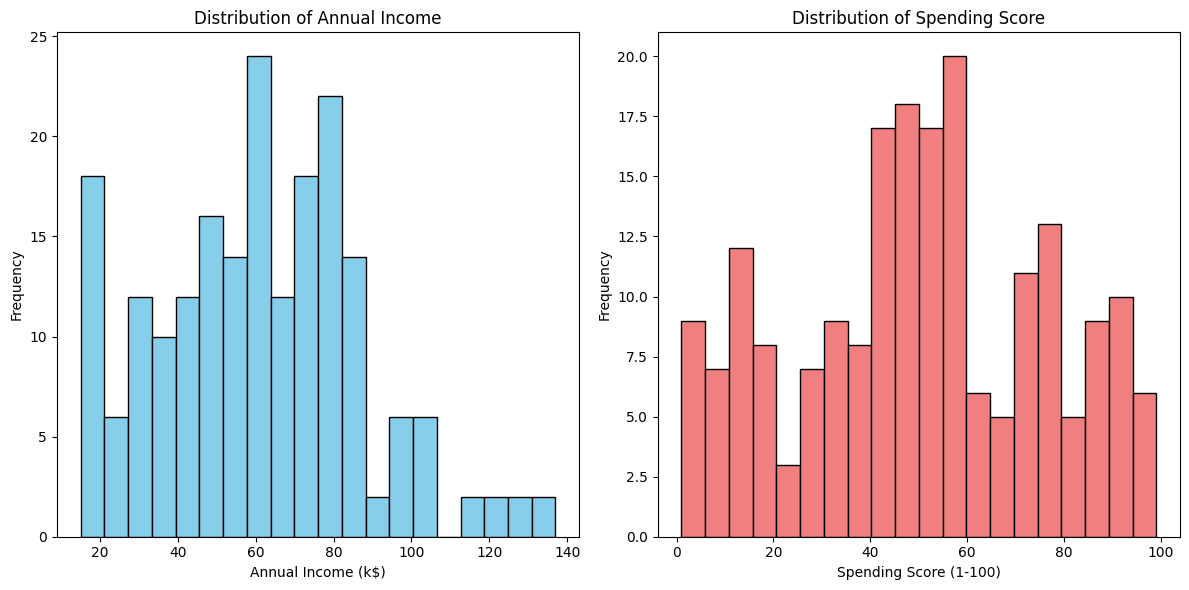

       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


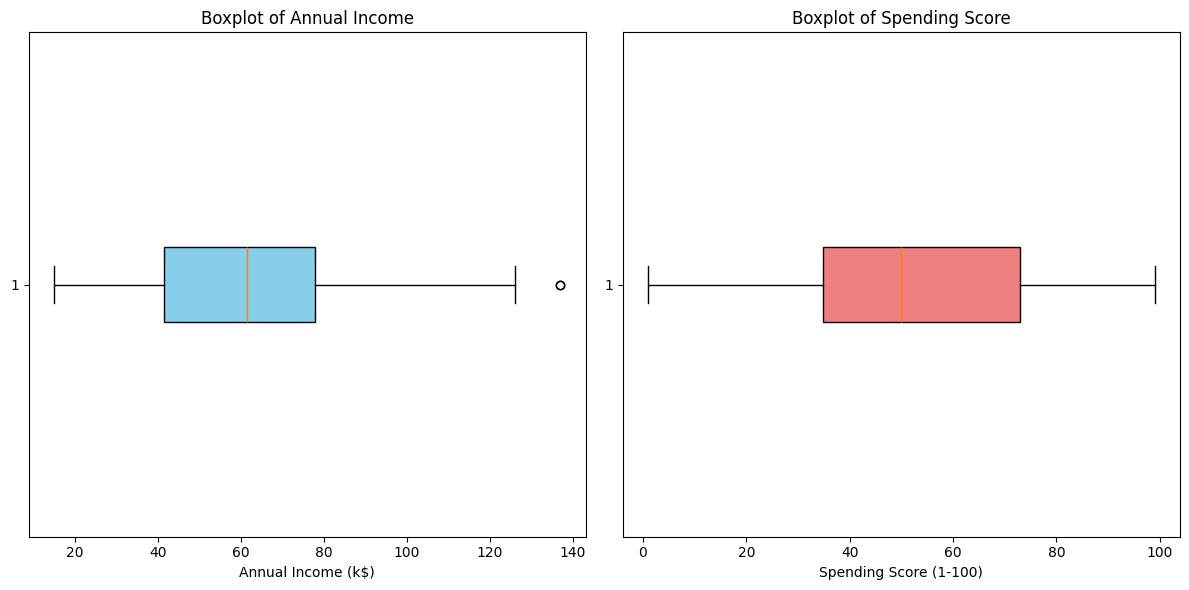

Correlation between Annual Income and Spending Score: 0.009902848094037608


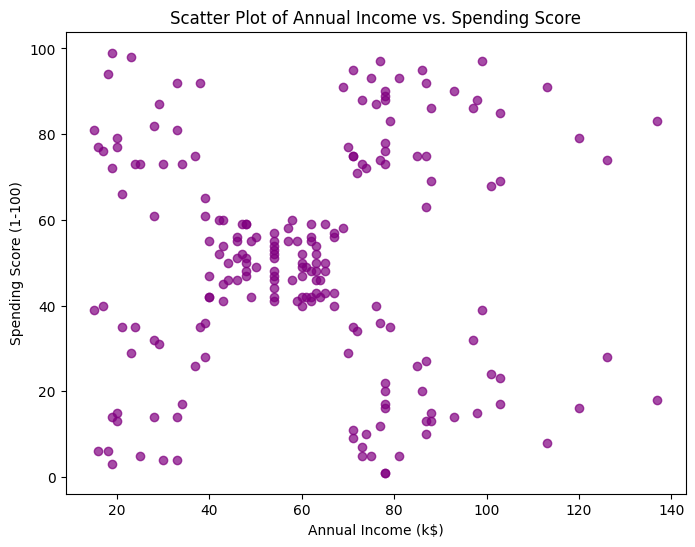

Summary:
No missing values.
Annual income is right-skewed, spending score is relatively normally distributed.
Boxplots and descriptive statistics provide a summary of the distributions.
Low correlation between annual income and spending score.


In [2]:
# Examine data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Analyze distribution of key features
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Annual Income (k$)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')

plt.subplot(1, 2, 2)
plt.hist(df['Spending Score (1-100)'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Distribution of Spending Score')
plt.tight_layout()
plt.show()


# Calculate descriptive statistics
print(df[['Annual Income (k$)', 'Spending Score (1-100)']].describe())

# Visualize descriptive statistics with box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['Annual Income (k$)'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel('Annual Income (k$)')
plt.title('Boxplot of Annual Income')

plt.subplot(1, 2, 2)
plt.boxplot(df['Spending Score (1-100)'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Spending Score (1-100)')
plt.title('Boxplot of Spending Score')
plt.tight_layout()
plt.show()

# Determine correlation
correlation = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
print(f"Correlation between Annual Income and Spending Score: {correlation}")

# Visualize correlation with scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='purple', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.show()

# Summarize observations (replace with your actual observations)
print("Summary:")
print("No missing values.")
print("Annual income is right-skewed, spending score is relatively normally distributed.")
print("Boxplots and descriptive statistics provide a summary of the distributions.")
print("Low correlation between annual income and spending score.")

## Data preparation

### Subtask:
Prepare the data for K-means clustering.


**Reasoning**:
Select the features 'Annual Income (k$)' and 'Spending Score (1-100)' from the DataFrame, standardize them using StandardScaler, and visualize the standardized features using a scatter plot.



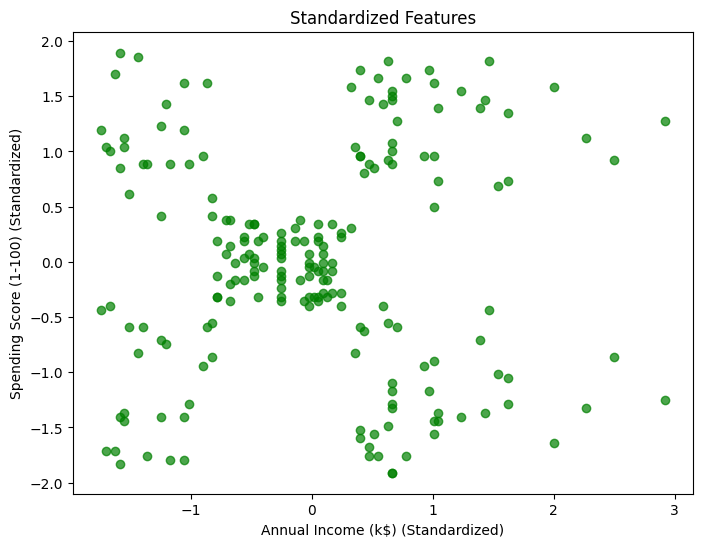

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [3]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Visualize the standardized features
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled_df['Annual Income (k$)'], X_scaled_df['Spending Score (1-100)'], color='green', alpha=0.7)
plt.xlabel('Annual Income (k$) (Standardized)')
plt.ylabel('Spending Score (1-100) (Standardized)')
plt.title('Standardized Features')
plt.show()
display(X_scaled_df.head())

## Data clustering

### Subtask:
Perform K-means clustering on the standardized data.


**Reasoning**:
Apply the K-means clustering algorithm to the standardized data, determine the optimal number of clusters using the elbow method, and assign cluster labels to the data points.



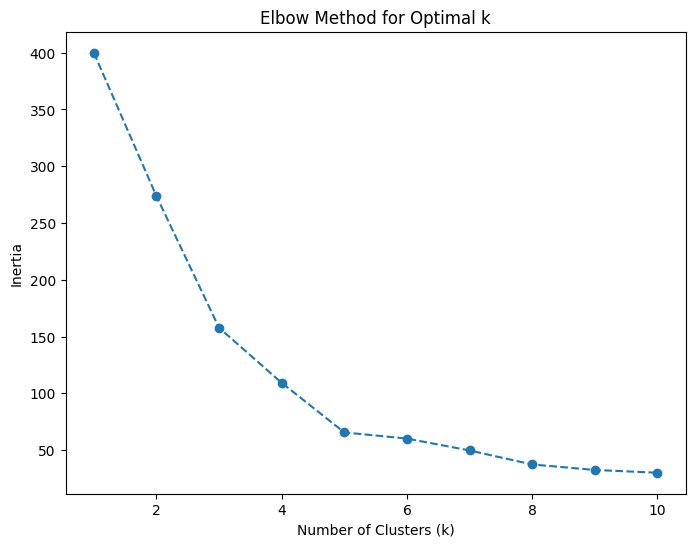

,Annual Income (k$),Spending Score (1-100),cluster_label
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,2
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,2
4,-1.662660,-0.395980,4


In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal k using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow method, choose k = 5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled_df)

# Add cluster labels to the DataFrame
X_scaled_df['cluster_label'] = kmeans.labels_
display(X_scaled_df.head())

## Data visualization

### Subtask:
Visualize the clusters in a 2D scatter plot.


**Reasoning**:
Create a scatter plot to visualize the clusters based on annual income and spending score, color-coded by cluster label.



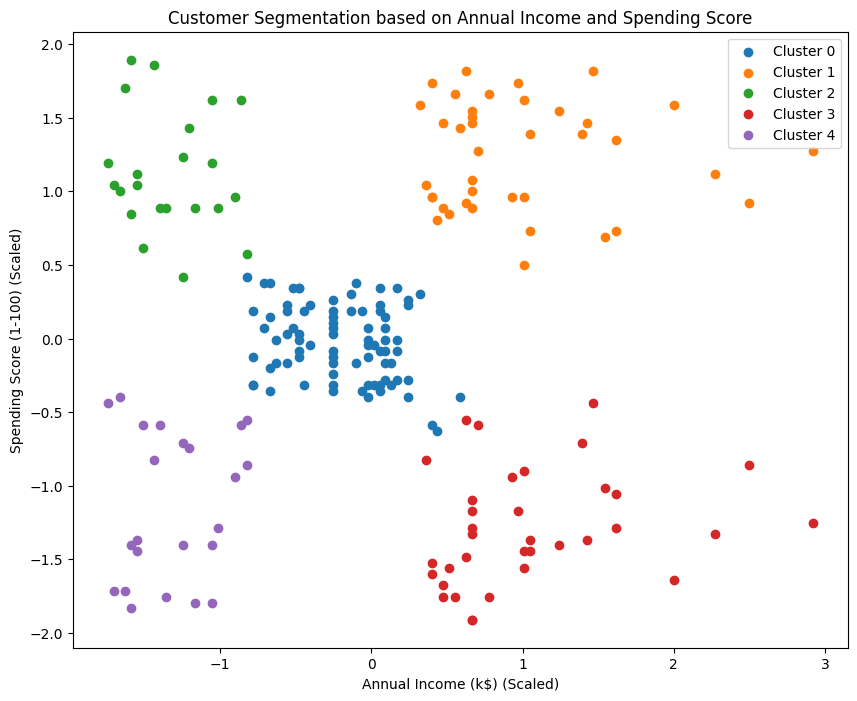

In [5]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 8))
for cluster_label in range(5):
    cluster_data = X_scaled_df[X_scaled_df['cluster_label'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster_label}')

plt.xlabel('Annual Income (k$) (Scaled)')
plt.ylabel('Spending Score (1-100) (Scaled)')
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.legend()
plt.show()

**Reasoning**:
The previous command generated a plot, but the plot itself is not displayed in the notebook.  I will try to display the plot using `display` and then finish the task.



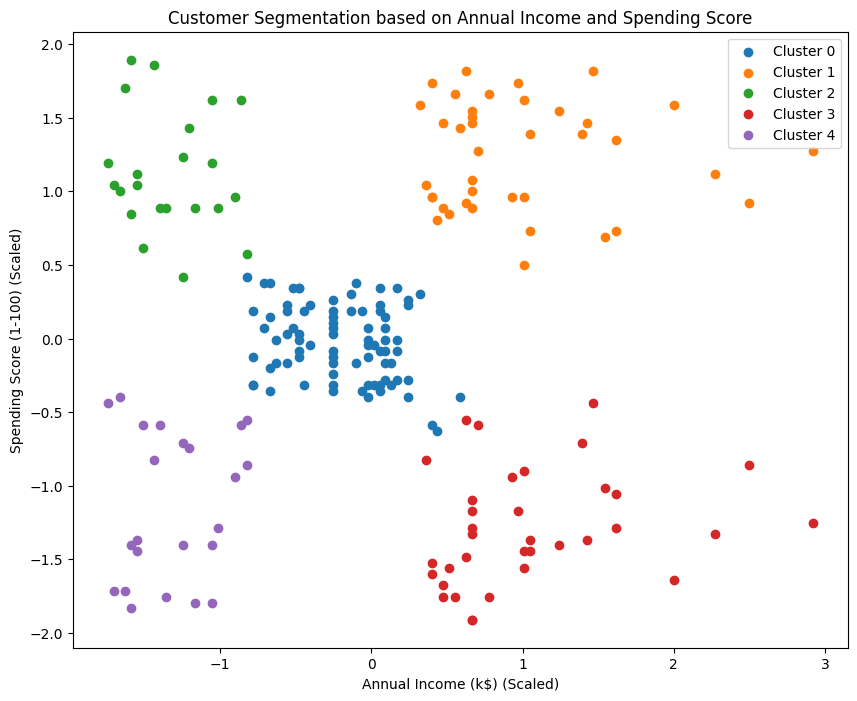

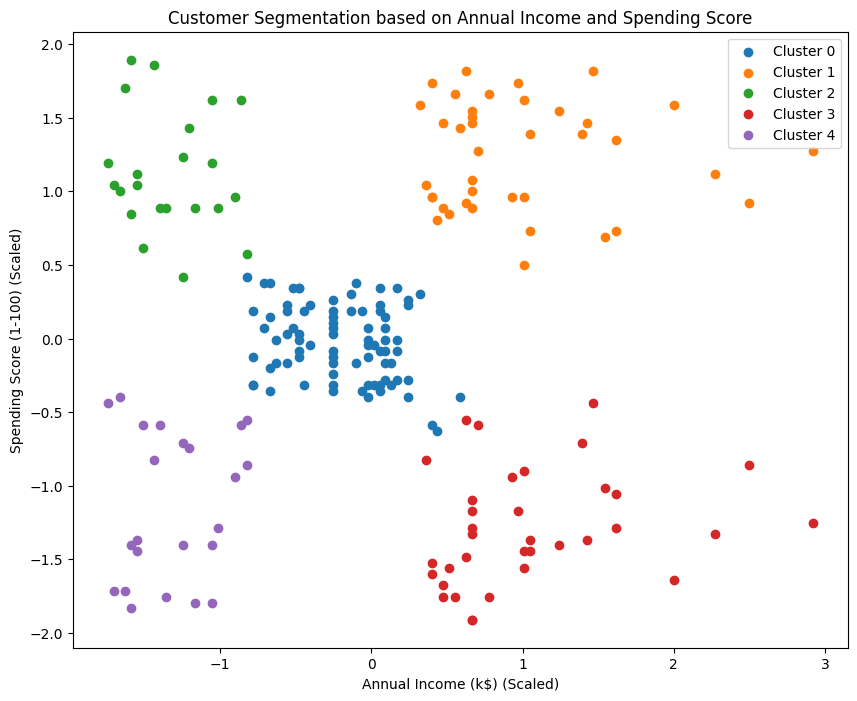

In [6]:
import matplotlib.pyplot as plt
from IPython.display import display

# Create a scatter plot
plt.figure(figsize=(10, 8))
for cluster_label in range(5):
    cluster_data = X_scaled_df[X_scaled_df['cluster_label'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster_label}')

plt.xlabel('Annual Income (k$) (Scaled)')
plt.ylabel('Spending Score (1-100) (Scaled)')
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.legend()
display(plt.gcf()) # Use display to show the plot

## Data analysis

### Subtask:
Analyze the characteristics of each customer cluster.


**Reasoning**:
Group the data by cluster label and calculate the mean income and spending score for each cluster. Then create a summary table to present the characteristics of each cluster.



In [7]:
# Group data by cluster label and calculate the mean of 'Annual Income (k$)' and 'Spending Score (1-100)'
cluster_means = X_scaled_df.groupby('cluster_label').mean()

# Create a summary table with descriptive names for each cluster
cluster_summary = []
for cluster_label, row in cluster_means.iterrows():
    mean_income = row['Annual Income (k$)']
    mean_spending = row['Spending Score (1-100)']

    if mean_income > 0.5 and mean_spending > 0.5:
        description = "High Income, High Spenders"
    elif mean_income < -0.5 and mean_spending < -0.5:
        description = "Low Income, Low Spenders"
    elif mean_income > 0.5 and mean_spending < -0.5:
        description = "High Income, Low Spenders"
    elif mean_income < -0.5 and mean_spending > 0.5:
        description = "Low Income, High Spenders"
    else:
        description = "Average Income, Average Spenders"

    cluster_summary.append([cluster_label, mean_income, mean_spending, description])

cluster_summary_df = pd.DataFrame(cluster_summary, columns=['Cluster Label', 'Mean Annual Income', 'Mean Spending Score', 'Cluster Description'])
display(cluster_summary_df)

,Cluster Label,Mean Annual Income,Mean Spending Score,Cluster Description
0,0,-0.200913,-0.026456,"Average Income, Average Spenders"
1,1,0.991583,1.239503,"High Income, High Spenders"
2,2,-1.329545,1.132178,"Low Income, High Spenders"
3,3,1.055003,-1.284439,"High Income, Low Spenders"
4,4,-1.307519,-1.136965,"Low Income, Low Spenders"


## Summary:

### Q&A

No questions were posed in the provided data analysis task.


### Data Analysis Key Findings

* **Low Correlation between Income and Spending:**  The exploratory data analysis revealed a low positive correlation (approximately 0.01) between annual income and spending score, suggesting these features are not strongly related.
* **Optimal Number of Clusters (k=5):** The elbow method, applied to the standardized data, suggested an optimal number of 5 clusters for the K-means algorithm.
* **Distinct Customer Clusters:** Five distinct customer segments were identified based on their annual income and spending score: High Income, High Spenders; Low Income, High Spenders; High Income, Low Spenders; Low Income, Low Spenders; and Average Income, Average Spenders.  These segments were defined by the average annual income and spending score within each cluster.
* **Data Standardization:** Feature scaling using `StandardScaler` was applied to 'Annual Income (k$)' and 'Spending Score (1-100)' before clustering, which is crucial for K-means performance.


### Insights or Next Steps

* **Targeted Marketing Strategies:**  Develop targeted marketing campaigns tailored to each customer segment's spending behavior and income level.  For example, offer exclusive discounts or promotions to high-spending customers, while focusing on value and affordability for budget-conscious shoppers.
* **Further Cluster Analysis:** Explore additional features from the original dataset ('Gender', 'Age', etc.) to enrich the customer segmentation analysis and potentially reveal more granular customer profiles.  Investigate potential interactions between these features and the clusters identified.
